In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Zadanie 1.1
Załaduj zbiór danych Wine.

In [3]:
wine_data = load_wine()
df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine['target'] = wine_data.target
print(df_wine.info())
print(df_wine.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Zadanie 1.2
Wyświetl: liczbę próbek i cech, nazwy cech, rozkład klas.

In [4]:
print(f"Liczba próbek i cech: {df_wine.shape}")
print("Nazwy cech:")
for col in df_wine.columns[:-1]:
    print(f"- {col}")
print("Rozkład klas:")
print(df_wine['target'].value_counts())

Liczba próbek i cech: (178, 14)
Nazwy cech:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280/od315_of_diluted_wines
- proline
Rozkład klas:
target
1    71
0    59
2    48
Name: count, dtype: int64


## Zadanie 1.3
Przeprowadź standaryzację. **Wyjaśnij**, dlaczego jest konieczna przed PCA.

In [5]:
X = df_wine.drop('target', axis=1)
y = df_wine['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Po standaryzacji:")
print(X_scaled.shape)
print(X_scaled.head())

Po standaryzacji:
(178, 13)
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  


Standaryzacja przed PCA jest konieczna, ponieważ PCA jest wrażliwe na skalę zmiennych. Bez standaryzacji zmienne o większych wartościach zdominowałyby analizę.


# Zadanie 2.1
Wykonaj PCA (wszystkie składowe)


In [7]:
pca = PCA(n_components=None)
pca.fit(X_scaled)
df_pca = pca.transform(X_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

print("Po PCA:")
print(df_pca.shape)
print(df_pca.head())

Po PCA:
(178, 13)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.065139 -0.641443  1.020956 -0.451563  0.540810 -0.066239  
1 -1.024416  0.308847  0.159701 -0.142657  0.388238  0.003637  
2  0.344216  1.177834  0.113361 -0.286673  0.000584  0.021717  
3 -0.643593 -0.052544  0.239413  0.759584 -0.242020 -0.369484  
4 -0.416700 -0.326819 -0.078366 -0.525945 -0.216664 -0.079364  


# Zadanie 2.2
Wyświetl: wartości własne, % wyjaśnionej wariancji, skumulowaną wariancję.

In [11]:
print("Wartości własne:")
for i, ev in enumerate(pca.explained_variance_):
    print(f"PC{i+1}: {ev:.4f}")
print("% wyjaśnionej wariancji:")
for i, evr in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {evr:.4f} ({evr*100:.2f}%)")
print("Skumulowana wariancja:")
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, cev in enumerate(cum_explained_variance):
    print(f"PC{i+1}: {cev:.4f} ({cev*100:.2f}%)")

Wartości własne:
PC1: 4.7324
PC2: 2.5111
PC3: 1.4542
PC4: 0.9242
PC5: 0.8580
PC6: 0.6453
PC7: 0.5541
PC8: 0.3505
PC9: 0.2905
PC10: 0.2523
PC11: 0.2271
PC12: 0.1697
PC13: 0.1040
% wyjaśnionej wariancji:
PC1: 0.3620 (36.20%)
PC2: 0.1921 (19.21%)
PC3: 0.1112 (11.12%)
PC4: 0.0707 (7.07%)
PC5: 0.0656 (6.56%)
PC6: 0.0494 (4.94%)
PC7: 0.0424 (4.24%)
PC8: 0.0268 (2.68%)
PC9: 0.0222 (2.22%)
PC10: 0.0193 (1.93%)
PC11: 0.0174 (1.74%)
PC12: 0.0130 (1.30%)
PC13: 0.0080 (0.80%)
Skumulowana wariancja:
PC1: 0.3620 (36.20%)
PC2: 0.5541 (55.41%)
PC3: 0.6653 (66.53%)
PC4: 0.7360 (73.60%)
PC5: 0.8016 (80.16%)
PC6: 0.8510 (85.10%)
PC7: 0.8934 (89.34%)
PC8: 0.9202 (92.02%)
PC9: 0.9424 (94.24%)
PC10: 0.9617 (96.17%)
PC11: 0.9791 (97.91%)
PC12: 0.9920 (99.20%)
PC13: 1.0000 (100.00%)


# Zadanie 2.3
Ile składowych potrzeba dla ≥ 80% wariancji?

In [12]:
min_components_80_percent = 0
for i, explained_variance in enumerate(cum_explained_variance):
    if explained_variance >= 0.80:
        min_components_80_percent = i + 1
        break
print(f"Liczba składowych potrzebna dla >= 80% wariancji: {min_components_80_percent}")

Liczba składowych potrzebna dla >= 80% wariancji: 5


## Zadanie 3.1
Scree Plot - zaznacz "łokieć".

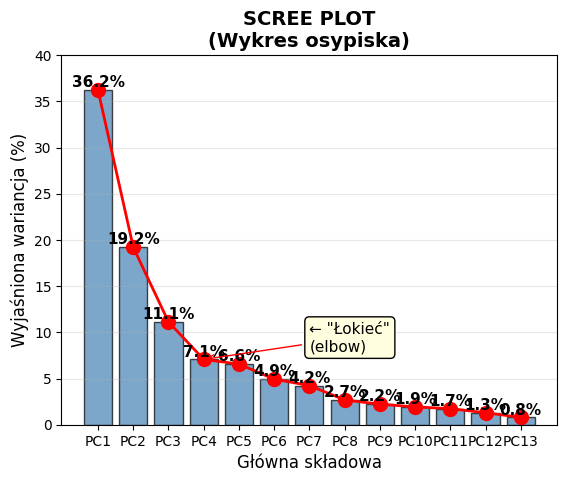

In [29]:
#fig, axes = plt.subplots(2, 2, figsize=(16, 14))
pc_labels = []
variance_pct = []
for i, evr in enumerate(pca.explained_variance_ratio_):
  pc_labels.append(f"PC{i+1}")
  variance_pct.append(evr*100)
bars = plt.bar(pc_labels, variance_pct, color='steelblue', edgecolor='black', alpha=0.7)
plt.plot(pc_labels, variance_pct, 'ro-', markersize=10, linewidth=2)
plt.ylabel('Wyjaśniona wariancja (%)', fontsize=12)
plt.xlabel('Główna składowa', fontsize=12)
plt.title('SCREE PLOT\n(Wykres osypiska)', fontsize=14, fontweight='bold')
plt.ylim(0, 40)
for bar, pct in zip(bars, variance_pct):
    plt.annotate(f'{pct:.1f}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.annotate('← "Łokieć"\n(elbow)', xy=(3, variance_pct[3]), xytext=(6, 8),
             fontsize=11, arrowprops=dict(arrowstyle='->', color='red'),
             bbox=dict(boxstyle='round', facecolor='lightyellow'))
plt.grid(axis='y', alpha=0.3)


# Zadanie 3.2
Projekcja 2D (PC1 vs PC2) z kolorami klas.

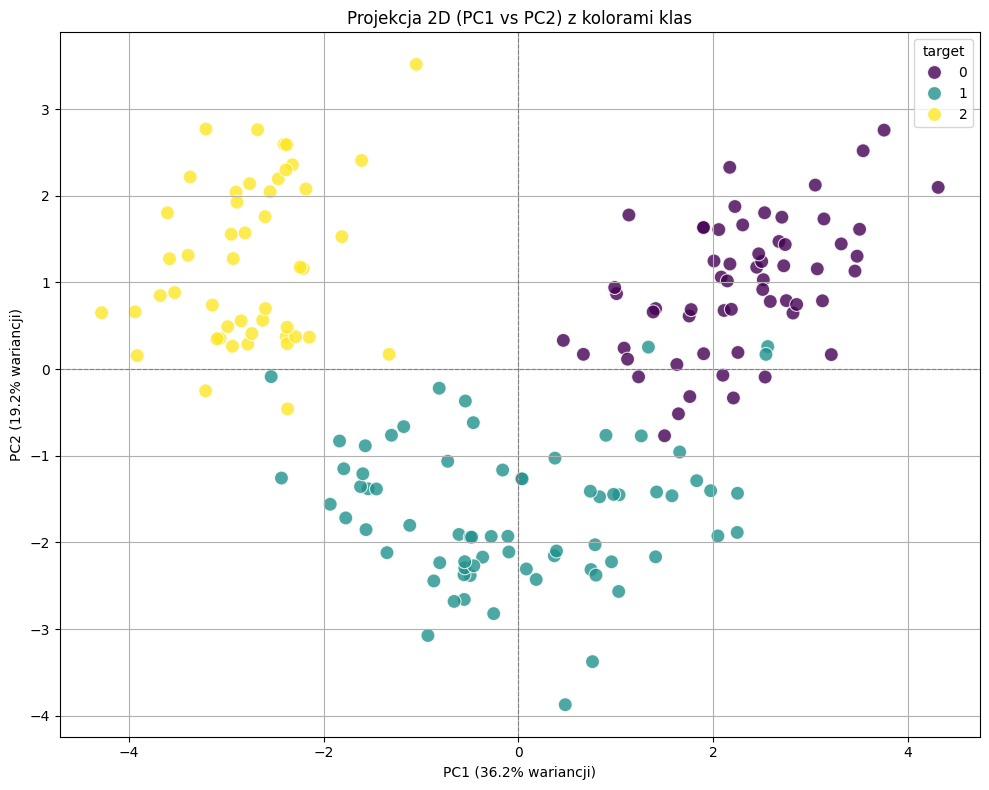

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue=y,
    palette='viridis',
    data=df_pca,
    s=100,
    alpha=0.8,
    legend='full'
)

plt.title('Projekcja 2D (PC1 vs PC2) z kolorami klas')
plt.xlabel(f'PC1 ({variance_pct[0]:.1f}% wariancji)')
plt.ylabel(f'PC2 ({variance_pct[1]:.1f}% wariancji)')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# Zadanie 3.3
Biplot punkty danych + wektory cech.

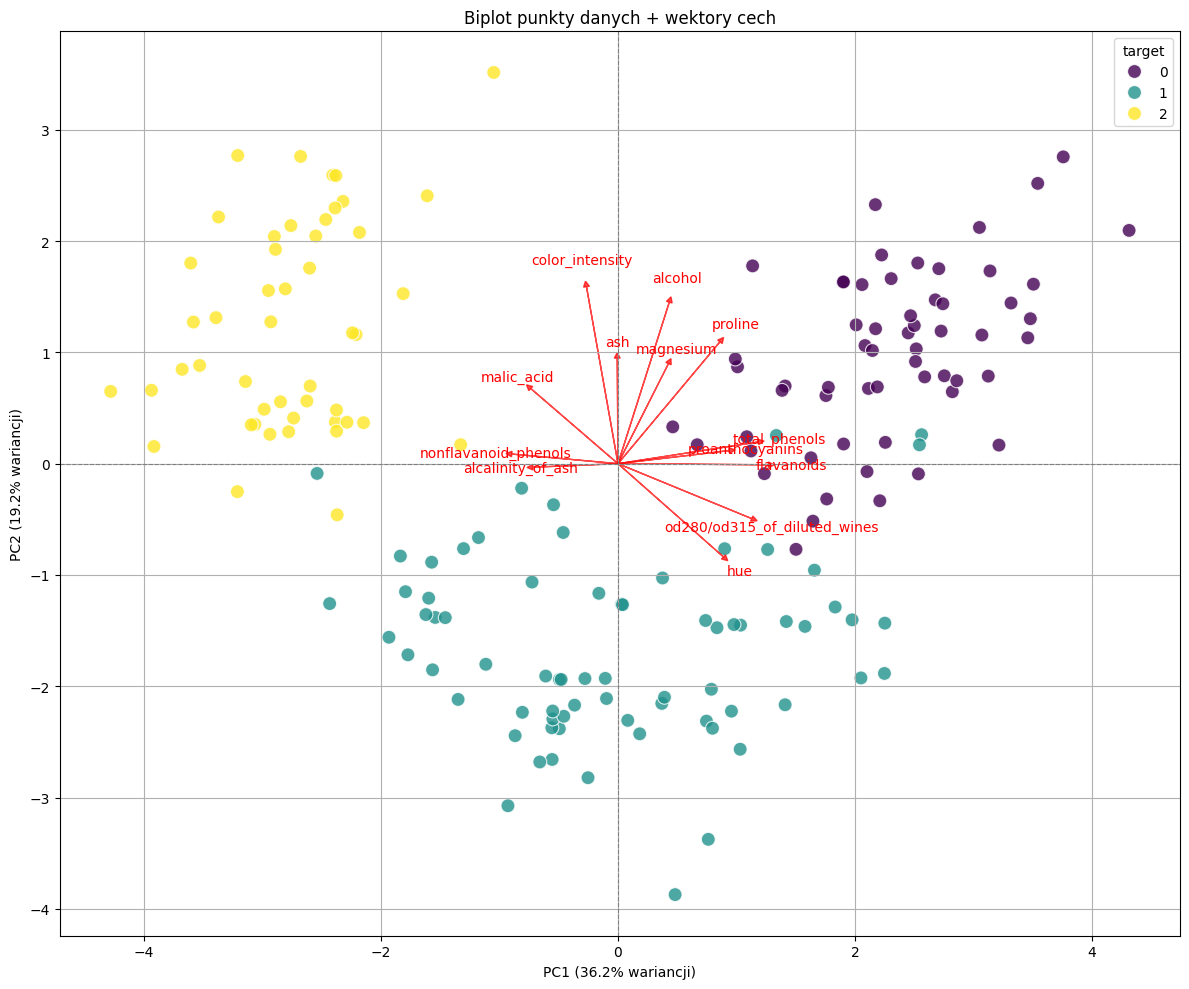

In [34]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue=y,
    palette='viridis',
    data=df_pca,
    s=100,
    alpha=0.8,
    legend='full'
)

plt.title('Biplot punkty danych + wektory cech')
plt.xlabel(f'PC1 ({variance_pct[0]:.1f}% wariancji)')
plt.ylabel(f'PC2 ({variance_pct[1]:.1f}% wariancji)')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
feature_names = X.columns
loadings = pca.components_.T
scaler_factor = 3
max_pc1 = df_pca['PC1'].abs().max()
max_pc2 = df_pca['PC2'].abs().max()
max_coord = max(max_pc1, max_pc2)
scaler = np.ceil(max_coord / np.max(np.abs(loadings))) * 0.5
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[i, 0] * scaler, loadings[i, 1] * scaler, color='r', alpha=0.7, head_width=0.05, head_length=0.05)
    plt.text(loadings[i, 0] * scaler * 1.15, loadings[i, 1] * scaler * 1.15, feature, color='r', ha='center', va='center')
plt.tight_layout()
plt.show()

# Zadanie 4.1
Wyświetl ładunki (loadings) dla PC1 i PC2.

In [38]:
loadings_df = pd.DataFrame(pca.components_[:2, :], columns=X.columns, index=['PC1', 'PC2'])
print(loadings_df.T)

                                   PC1       PC2
alcohol                       0.144329  0.483652
malic_acid                   -0.245188  0.224931
ash                          -0.002051  0.316069
alcalinity_of_ash            -0.239320 -0.010591
magnesium                     0.141992  0.299634
total_phenols                 0.394661  0.065040
flavanoids                    0.422934 -0.003360
nonflavanoid_phenols         -0.298533  0.028779
proanthocyanins               0.313429  0.039302
color_intensity              -0.088617  0.529996
hue                           0.296715 -0.279235
od280/od315_of_diluted_wines  0.376167 -0.164496
proline                       0.286752  0.364903


# Zadanie 4.2
Odpowiedz:
* Które cechy dominują w PC1? Co reprezentuje ta składowa?
* Które cechy dominują w PC2?
* Czy klasy są dobrze separowalne w 2D?

Wyjaśnij różnice - która cecha zdominowała analizę bez standaryzacji?

**Które cechy dominują w PC1? Co reprezentuje ta składowa?**

W PC1 dominują cechy takie jak `flavanoids` (0.4229), `total_phenols` (0.3947), `od280/od315_of_diluted_wines` (0.3762), `proanthocyanins` (0.3134) i `proline` (0.2868). PC1 wydaje się reprezentować jakość wina.

**Które cechy dominują w PC2?**

W PC2 dominują cechy takie jak `color_intensity` (0.5300), `alcohol` (0.4837), `proline` (0.3649), `ash` (0.3161) i `magnesium` (0.2996).

**Czy klasy są dobrze separowalne w 2D?**

Tak, na podstawie projekcji 2D (PC1 vs PC2) klasy są dość dobrze separowalne. Klasa 0 (fioletowe punkty), klasa 1 (żółte punkty) i klasa 2 (zielone punkty) tworzą oddzielne skupiska. Rozróżnienie między klasami jest wyraźne w płaszczyźnie utworzonej przez dwie pierwsze główne składowe.

**Wyjaśnij różnice - która cecha zdominowała analizę bez standaryzacji?**

Bez standaryzacji, proline (o wartościach w zakresie 200-1700) zdominowałaby obliczenia PCA, ponieważ jej wariancja byłaby znacznie większa niż innych cech, niezależnie od jej rzeczywistego znaczenia dla struktury danych. W konsekwencji, PC1 i inne składowe byłyby głównie odbiciem zmienności proline.
